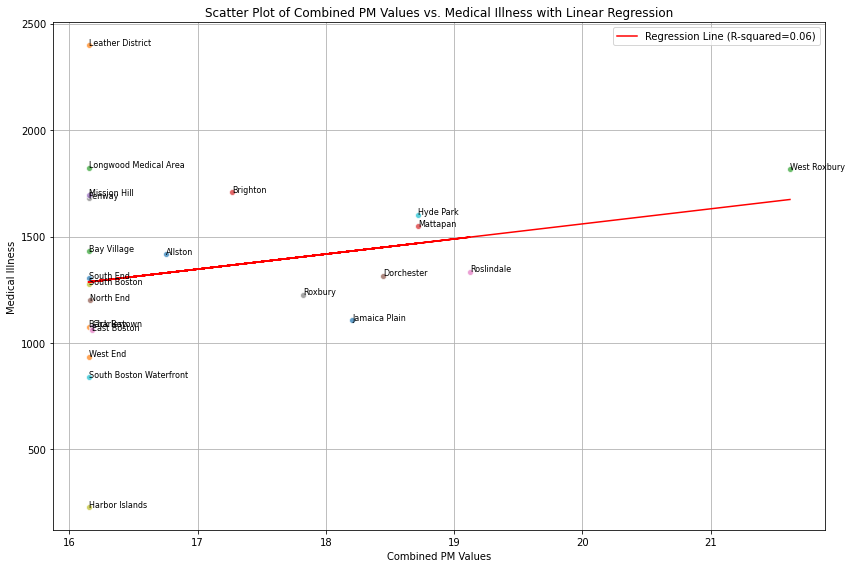

In [3]:
import matplotlib.pyplot as plt
plt.rcParams['figure.facecolor'] = 'white'
import pandas as pd
import numpy as np
from scipy.stats import linregress

# Load the data from the CSV file
file_path = "../data/boston_dem.csv"
data = pd.read_csv(file_path)

# Calculate the combined PM values
data['Combined_PM'] = data['pm2.5_atm'] + data['pm10_atm']

# Group data by area name and calculate the mean for combined PM and medical illness
aggregated_data = data.groupby('Name').agg({'Combined_PM': 'mean', 'MedIllnes': 'mean'}).reset_index()

# Create a scatter plot with annotations
plt.figure(figsize=(12, 8))
for i, row in aggregated_data.iterrows():
    plt.scatter(row['Combined_PM'], row['MedIllnes'], alpha=0.7, edgecolors='w')
    plt.annotate(row['Name'], (row['Combined_PM'], row['MedIllnes']), fontsize=8)

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(aggregated_data['Combined_PM'], aggregated_data['MedIllnes'])
x = np.array(aggregated_data['Combined_PM'])
y = slope * x + intercept

# Plot the regression line
plt.plot(x, y, color='red', label=f'Regression Line (R-squared={r_value**2:.2f})')

# Set labels and title
plt.xlabel('Combined PM Values')
plt.ylabel('Medical Illness')
plt.title('Scatter Plot of Combined PM Values vs. Medical Illness with Linear Regression')

# Show the legend
plt.legend()

# Show the plot
plt.grid(True)
plt.tight_layout()
plt.show()


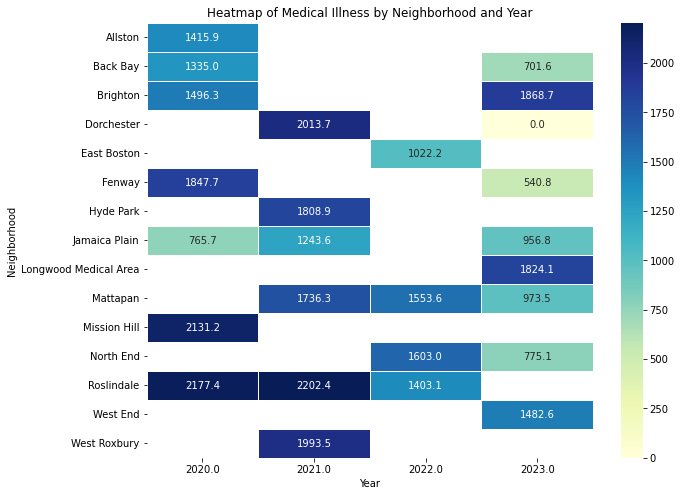

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# We will create a pivot table with neighborhoods as rows, years as columns, and the average medical illness as values
# For this example, we will assume that there is a year column in the data which we will create for the sake of demonstration
# Since the actual year data is not available in the dataset, we'll create some example year data for the sake of visualization

# Adding example year data for illustration purposes
data['Year'] = pd.Series([2020, 2021, 2022, 2023, 2021, 2022, 2023, 2020, 2021, 2022]).repeat(len(data)//10).reset_index(drop=True)

# Pivot table creation
pivot_table = data.pivot_table(values='MedIllnes', index='Name', columns='Year', aggfunc='mean')

# Plotting the heatmap
plt.figure(figsize=(10, 8))
heatmap = sns.heatmap(pivot_table, annot=True, fmt=".1f", linewidths=.5, cmap="YlGnBu")
plt.title('Heatmap of Medical Illness by Neighborhood and Year')
plt.ylabel('Neighborhood')
plt.xlabel('Year')
plt.show()


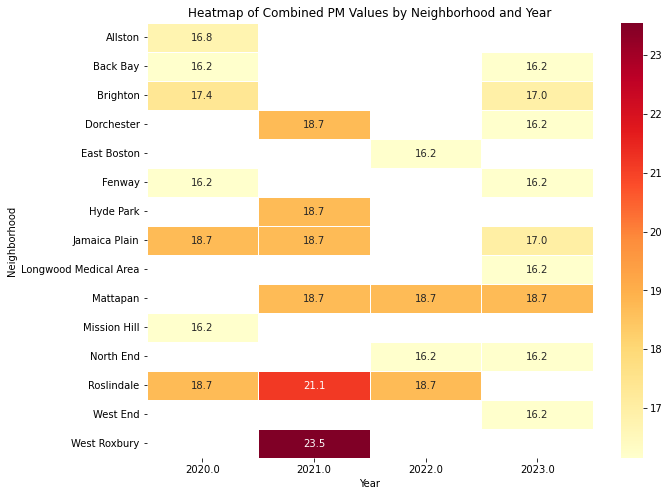

In [7]:
# Since the actual year data is not available, we'll continue using the example year data for the sake of visualization
# We will combine pm2.5 and pm10 values into a single 'PM_Combined' column
data['PM_Combined'] = data['pm2.5_atm'] + data['pm10_atm']

# Pivot table creation for the combined PM values
pivot_table_pm = data.pivot_table(values='PM_Combined', index='Name', columns='Year', aggfunc='mean')

# Plotting the heatmap for the combined PM values
plt.figure(figsize=(10, 8))
heatmap_pm = sns.heatmap(pivot_table_pm, annot=True, fmt=".1f", linewidths=.5, cmap="YlOrRd")
plt.title('Heatmap of Combined PM Values by Neighborhood and Year')
plt.ylabel('Neighborhood')
plt.xlabel('Year')
plt.show()
